In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
df = pd.read_csv('Red_Wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      57
total sulfur dioxide    143
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1359, 12)

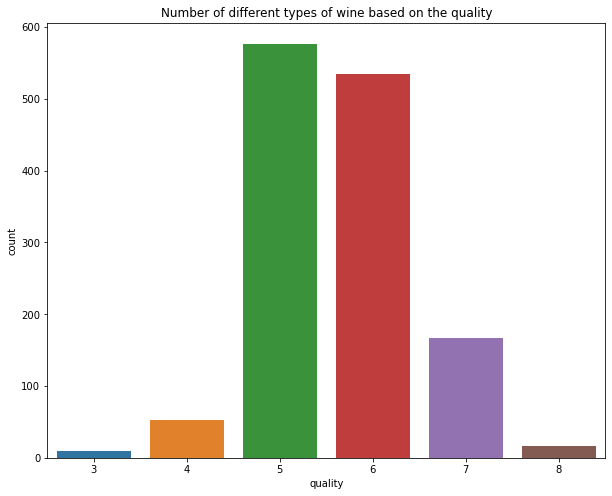

In [11]:
plt.figure(figsize=(10,8))
plt.title("Number of different types of wine based on the quality")
sns.countplot(x='quality', data=df)
plt.show()

### Bi Variate Analysis

#### Quality vs Fixed Acidity

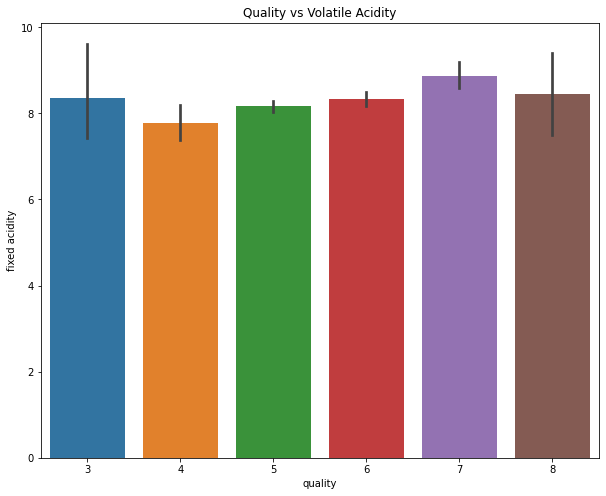

In [12]:
plt.figure(figsize=(10,8))
plt.title("Volatile Acidity vs Quality")
sns.barplot(x="quality", y="fixed acidity", data=df)
plt.title("Quality vs Volatile Acidity")
plt.show()

Insight from graph - Negligible impact

#### Quality vs Volatile Acidity

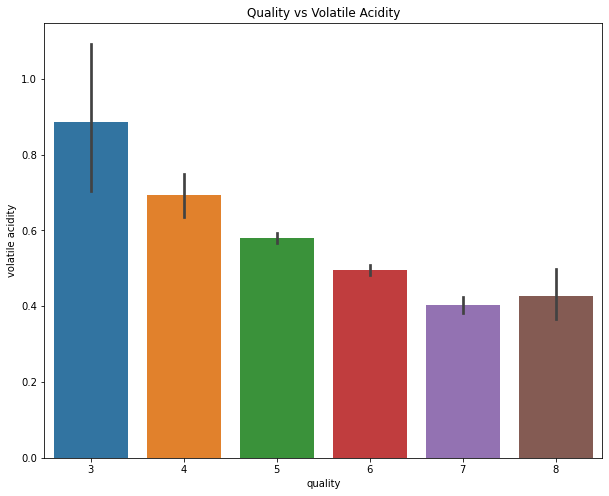

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="volatile acidity", data=df)
plt.title("Quality vs Volatile Acidity")
plt.show()

Insight from graph - Quality is good when the acidity is on a lower note

#### Quality vs Citric Acid 

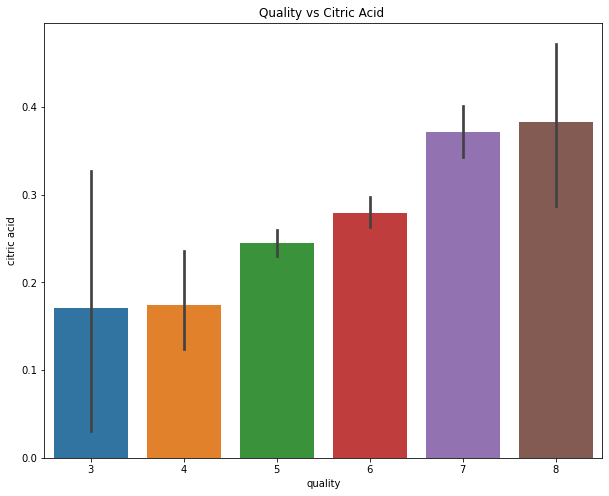

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="citric acid", data=df)
plt.title("Quality vs Citric Acid ")
plt.show()

Insight from graph - Quality is high when the citric acid content increases

#### Quality vs Sugar 

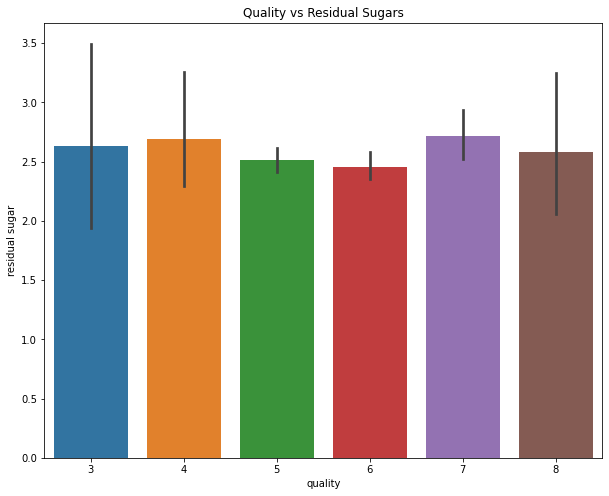

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="residual sugar", data=df)
plt.title("Quality vs Residual Sugars")
plt.show()

Insight from graph - Quality is not effected that much by sugar

#### Quality vs Chlorides 

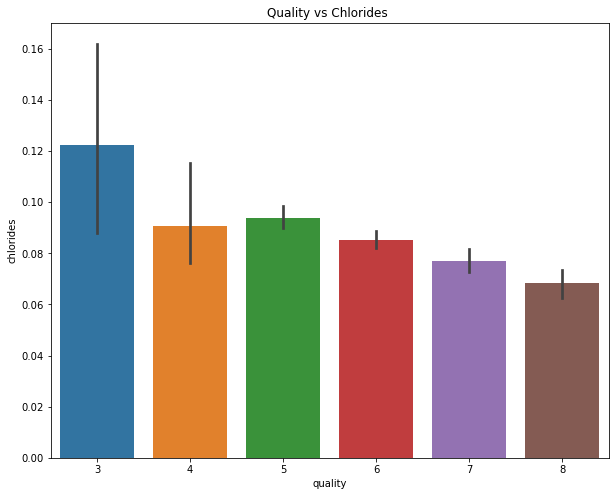

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="chlorides", data=df)
plt.title("Quality vs Chlorides ")
plt.show()

Insight from graph - Quality increases as chloride decreases

#### Quality vs Total Sulfur Dioxide

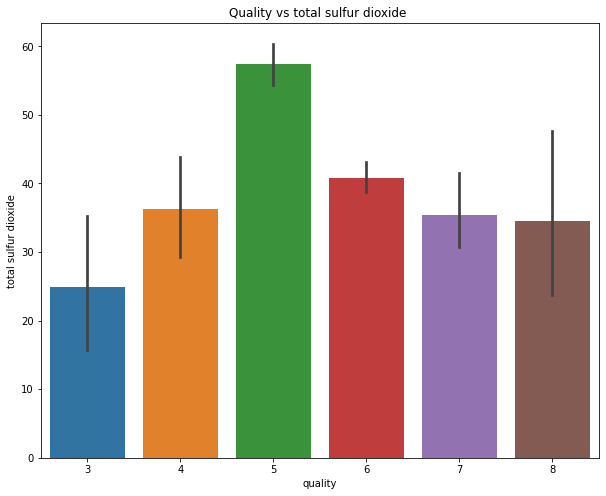

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="total sulfur dioxide", data=df)
plt.title("Quality vs total sulfur dioxide ")
plt.show()

#### Quality vs Density

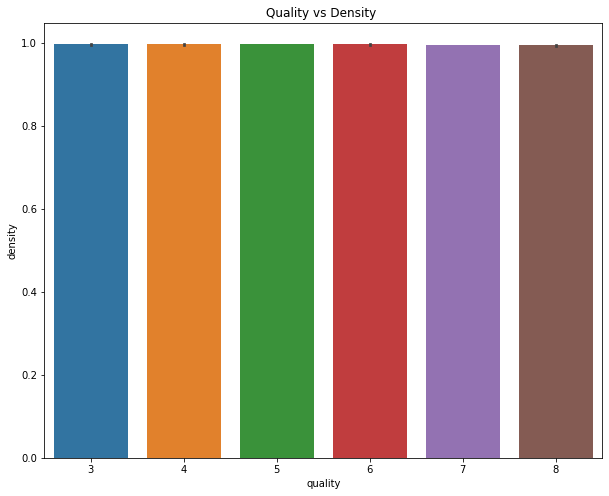

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="density", data=df)
plt.title("Quality vs Density ")
plt.show()

Insight from graph - Quality is not effected by density 

#### Quality vs pH

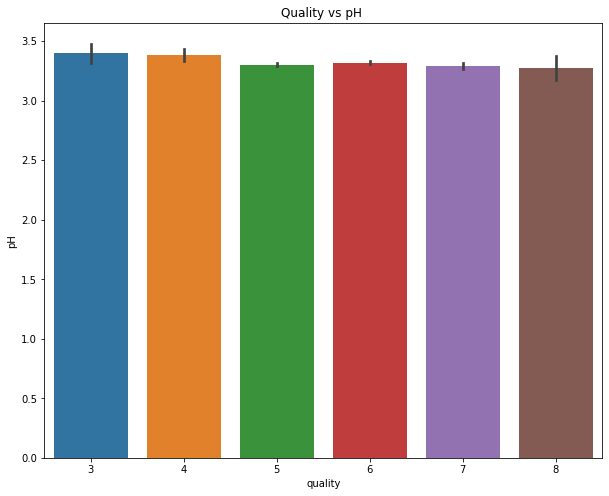

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="pH", data=df)
plt.title("Quality vs pH ")
plt.show()

Insight from graph - Quality is not effected by pH, but quality slightly increases as pH decreases

#### Quality vs Sulphates

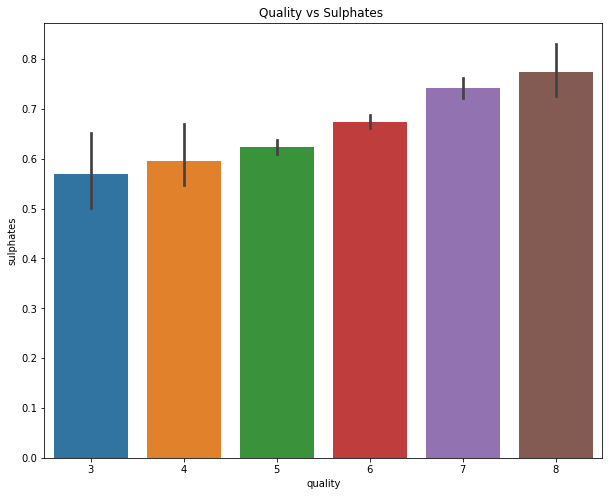

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="sulphates", data=df)
plt.title("Quality vs Sulphates ")
plt.show()

Insight from graph - Quality increases as the sulphates increases

#### Quality vs Alcohol

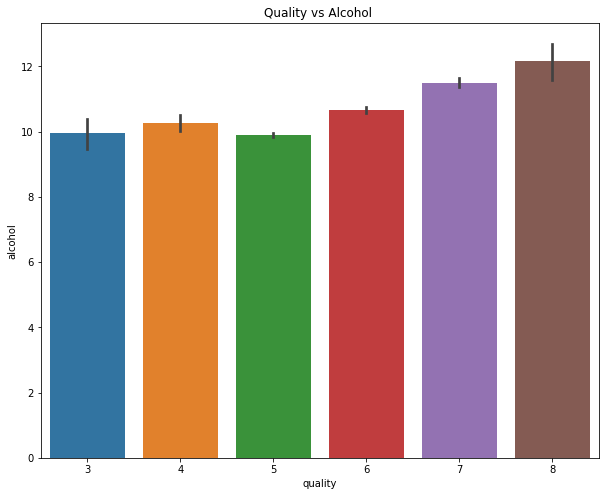

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x="quality", y="alcohol", data=df)
plt.title("Quality vs Alcohol ")
plt.show()

Insight from graph - Quality increases as alcohol content increases

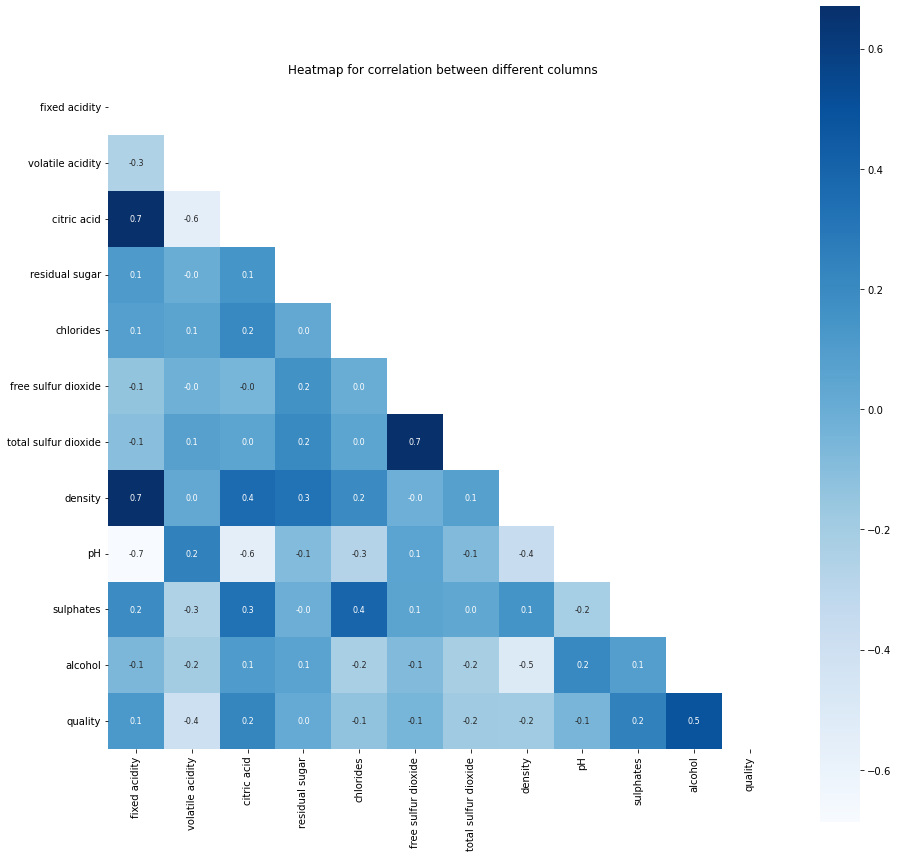

In [22]:
correlation = df.corr()
ut = np.triu(correlation)
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8}, cmap='Blues', mask = ut)
plt.title("Heatmap for correlation between different columns")
plt.show()

### Preprocessing the data

Assigning the features and target to X & y respectively

In [23]:
X = df.drop(columns="quality", axis = 1)

#Binarization of target variable
y = df['quality'].apply(lambda y: 1 if y >= 7 else 0)

### Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Model Building

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

### Model Evaluation

In [27]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test, pred_test)

In [28]:
print('Accuracy on train data = ', accuracy_train)
print('Accuracy on test data = ', accuracy_test)

Accuracy on train data =  1.0
Accuracy on test data =  0.8970588235294118


In [29]:
precision = precision_score(y_test, pred_test)
print('Precision =', precision)

Precision = 0.8


In [30]:
recall = recall_score(y_test, pred_test)
print('Recall =', recall)

Recall = 0.32432432432432434
